In [95]:
import numpy as np
import pandas as pd 
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()


database = '../Downloads/database.sqlite'



In [86]:
conn = sqlite3.connect(database)

tables = pd.read_sql("""SELECT *
                        FROM sqlite_master
                        WHERE type='table';""", conn)
tables

,type,name,tbl_name,rootpage,sql
0,table,sqlite_sequence,sqlite_sequence,4,"CREATE TABLE sqlite_sequence(name,seq)"
1,table,Player_Attributes,Player_Attributes,11,"CREATE TABLE ""Player_Attributes"" (\n\t`id`\tIN..."
2,table,Player,Player,14,CREATE TABLE `Player` (\n\t`id`\tINTEGER PRIMA...
3,table,Match,Match,18,CREATE TABLE `Match` (\n\t`id`\tINTEGER PRIMAR...
4,table,League,League,24,CREATE TABLE `League` (\n\t`id`\tINTEGER PRIMA...
5,table,Country,Country,26,CREATE TABLE `Country` (\n\t`id`\tINTEGER PRIM...
6,table,Team,Team,29,"CREATE TABLE ""Team"" (\n\t`id`\tINTEGER PRIMARY..."
7,table,Team_Attributes,Team_Attributes,2,CREATE TABLE `Team_Attributes` (\n\t`id`\tINTE...


In [96]:

Team_Attributes = pd.read_sql("""SELECT * 
                        FROM Team_Attributes
                        """, conn)


In [89]:


print("Team_Attributes")
print(Team_Attributes.shape)
print(Team_Attributes.columns)
print("-"*100)


Team_Attributes
(1458, 25)
Index(['id', 'team_fifa_api_id', 'team_api_id', 'date', 'buildUpPlaySpeed',
       'buildUpPlaySpeedClass', 'buildUpPlayDribbling',
       'buildUpPlayDribblingClass', 'buildUpPlayPassing',
       'buildUpPlayPassingClass', 'buildUpPlayPositioningClass',
       'chanceCreationPassing', 'chanceCreationPassingClass',
       'chanceCreationCrossing', 'chanceCreationCrossingClass',
       'chanceCreationShooting', 'chanceCreationShootingClass',
       'chanceCreationPositioningClass', 'defencePressure',
       'defencePressureClass', 'defenceAggression', 'defenceAggressionClass',
       'defenceTeamWidth', 'defenceTeamWidthClass',
       'defenceDefenderLineClass'],
      dtype='object')
----------------------------------------------------------------------------------------------------


In [10]:
Matchs_results = pd.read_sql("""SELECT Match.id
                            ,Country.name  country_name
                            ,League.name  League_name
                            ,date
                            ,season
                            ,Home_team.team_long_name  Home_team
                            ,away_team.team_long_name  away_team
                            ,home_team_goal
                            ,away_team_goal

 
                        FROM Country 
                        
                        join Match
                        on Country.id = Match.Country_id
                        
                        join League
                        on Country.id = League.Country_id
                        
                        LEFT JOIN Team AS Home_team 
                        on Home_team.team_api_id = Match.home_team_api_id
                        
                        LEFT JOIN Team AS away_team 
                        on away_team.team_api_id = Match.away_team_api_id
                        
                        """, conn)

Matchs_results

,id,country_name,League_name,date,season,Home_team,away_team,home_team_goal,away_team_goal
0,1,Belgium,Belgium Jupiler League,2008-08-17 00:00:00,2008/2009,KRC Genk,Beerschot AC,1,1
1,2,Belgium,Belgium Jupiler League,2008-08-16 00:00:00,2008/2009,SV Zulte-Waregem,Sporting Lokeren,0,0
2,3,Belgium,Belgium Jupiler League,2008-08-16 00:00:00,2008/2009,KSV Cercle Brugge,RSC Anderlecht,0,3
3,4,Belgium,Belgium Jupiler League,2008-08-17 00:00:00,2008/2009,KAA Gent,RAEC Mons,5,0
4,5,Belgium,Belgium Jupiler League,2008-08-16 00:00:00,2008/2009,FCV Dender EH,Standard de Liège,1,3
...,...,...,...,...,...,...,...,...,...
25974,25975,Switzerland,Switzerland Super League,2015-09-22 00:00:00,2015/2016,FC St. Gallen,FC Thun,1,0
25975,25976,Switzerland,Switzerland Super League,2015-09-23 00:00:00,2015/2016,FC Vaduz,FC Luzern,1,2
25976,25977,Switzerland,Switzerland Super League,2015-09-23 00:00:00,2015/2016,Grasshopper Club Zürich,FC Sion,2,0
25977,25978,Switzerland,Switzerland Super League,2015-09-22 00:00:00,2015/2016,Lugano,FC Zürich,0,0


In [22]:
Matchs_results['winner'] = np.where(Matchs_results['home_team_goal'] > Matchs_results['away_team_goal'], Matchs_results['Home_team'], Matchs_results['away_team'])
Matchs_results['winner'] = np.where(Matchs_results['home_team_goal'] == Matchs_results['away_team_goal'], 'draw', Matchs_results['winner'])

Matchs_results['loser'] = np.where(Matchs_results['home_team_goal'] < Matchs_results['away_team_goal'], Matchs_results['Home_team'], Matchs_results['away_team'])
Matchs_results['loser'] = np.where(Matchs_results['home_team_goal'] == Matchs_results['away_team_goal'], 'draw', Matchs_results['loser'])

Matchs_results

,id,country_name,League_name,date,season,Home_team,away_team,home_team_goal,away_team_goal,winner,loser
0,1,Belgium,Belgium Jupiler League,2008-08-17 00:00:00,2008/2009,KRC Genk,Beerschot AC,1,1,draw,draw
1,2,Belgium,Belgium Jupiler League,2008-08-16 00:00:00,2008/2009,SV Zulte-Waregem,Sporting Lokeren,0,0,draw,draw
2,3,Belgium,Belgium Jupiler League,2008-08-16 00:00:00,2008/2009,KSV Cercle Brugge,RSC Anderlecht,0,3,RSC Anderlecht,KSV Cercle Brugge
3,4,Belgium,Belgium Jupiler League,2008-08-17 00:00:00,2008/2009,KAA Gent,RAEC Mons,5,0,KAA Gent,RAEC Mons
4,5,Belgium,Belgium Jupiler League,2008-08-16 00:00:00,2008/2009,FCV Dender EH,Standard de Liège,1,3,Standard de Liège,FCV Dender EH
...,...,...,...,...,...,...,...,...,...,...,...
25974,25975,Switzerland,Switzerland Super League,2015-09-22 00:00:00,2015/2016,FC St. Gallen,FC Thun,1,0,FC St. Gallen,FC Thun
25975,25976,Switzerland,Switzerland Super League,2015-09-23 00:00:00,2015/2016,FC Vaduz,FC Luzern,1,2,FC Luzern,FC Vaduz
25976,25977,Switzerland,Switzerland Super League,2015-09-23 00:00:00,2015/2016,Grasshopper Club Zürich,FC Sion,2,0,Grasshopper Club Zürich,FC Sion
25977,25978,Switzerland,Switzerland Super League,2015-09-22 00:00:00,2015/2016,Lugano,FC Zürich,0,0,draw,draw


In [26]:
wins = Matchs_results.pivot_table(index = ['winner'], aggfunc ='size')
print(wins)

winner
1. FC Kaiserslautern          17
1. FC Köln                    60
1. FC Nürnberg                49
1. FSV Mainz 05               88
AC Ajaccio                    22
                            ... 
Zagłębie Lubin                59
Zawisza Bydgoszcz             19
draw                        6596
Évian Thonon Gaillard FC      45
Śląsk Wrocław                 89
Length: 297, dtype: int64


In [30]:
wins=wins.sort_values(ascending=False)
wins[:20]

winner
draw                   6596
FC Barcelona            234
Real Madrid CF          228
Celtic                  218
FC Bayern Munich        193
Manchester United       192
Juventus                189
SL Benfica              185
FC Porto                183
Ajax                    181
FC Basel                180
PSV                     178
Chelsea                 176
Paris Saint-Germain     175
Manchester City         175
Arsenal                 170
Atlético Madrid         167
Roma                    162
Borussia Dortmund       157
Inter                   154
dtype: int64

In [82]:
champions_leage = pd.read_csv('../Downloads/archive/AllTimeRankingByCountry.csv')
champions_leage[:4]


,Unnamed: 0,Country,Participated,Titles,Played,Win,Draw,Loss,Goals For,Goals Against,Pts,Goal Diff
0,1,Spain,95,11,947,485,233,229,1649,1027,1203,622
1,2,England,92,6,901,446,216,239,1515,958,1108,557
2,3,Italy,82,5,742,328,199,215,1089,856,855,233
3,4,Germany,82,4,727,331,155,241,1206,977,817,229


In [37]:
Spain = Matchs_results[Matchs_results["League_name"] == "Spain LIGA BBVA"]
England = Matchs_results[Matchs_results["League_name"] == "England Premier League"]
Italy = Matchs_results[Matchs_results["League_name"] == "Italy Serie A"]
Germany = Matchs_results[Matchs_results["League_name"] == "Germany 1. Bundesliga"]

In [39]:
Spain_wins = Spain.pivot_table(index = ['winner'], aggfunc ='size')
Spain_wins= Spain_wins.sort_values(ascending=False)
Spain_wins[:5]

winner
draw               704
FC Barcelona       234
Real Madrid CF     228
Atlético Madrid    167
Valencia CF        142
dtype: int64

In [43]:
home_RM = Matchs_results[Matchs_results["Home_team"] == "Real Madrid CF"]
away_RM = Matchs_results[Matchs_results["away_team"] == "Real Madrid CF"]
home_RM['match_result'] = np.where(home_RM['home_team_goal'] > home_RM['away_team_goal'], 'win', 'lose')
home_RM['match_result'] = np.where(home_RM['home_team_goal'] == home_RM['away_team_goal'], 'draw', home_RM['match_result'])

away_RM['match_result'] = np.where(away_RM['home_team_goal'] < away_RM['away_team_goal'], 'win', 'lose')
away_RM['match_result'] = np.where(away_RM['home_team_goal'] == away_RM['away_team_goal'], 'draw', away_RM['match_result'])


RM = pd.concat([home_RM, away_RM])
RM

<ipython-input-43-292a07bebfd0>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  home_RM['match_result'] = np.where(home_RM['home_team_goal'] > home_RM['away_team_goal'], 'win', 'lose')
<ipython-input-43-292a07bebfd0>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  home_RM['match_result'] = np.where(home_RM['home_team_goal'] == home_RM['away_team_goal'], 'draw', home_RM['match_result'])
<ipython-input-43-292a07bebfd0>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataF

,id,country_name,League_name,date,season,Home_team,away_team,home_team_goal,away_team_goal,winner,loser,match_result
21533,21534,Spain,Spain LIGA BBVA,2008-11-08 00:00:00,2008/2009,Real Madrid CF,Málaga CF,4,3,Real Madrid CF,Málaga CF,win
21554,21555,Spain,Spain LIGA BBVA,2008-11-22 00:00:00,2008/2009,Real Madrid CF,RC Recreativo,1,0,Real Madrid CF,RC Recreativo,win
21575,21576,Spain,Spain LIGA BBVA,2008-12-07 00:00:00,2008/2009,Real Madrid CF,Sevilla FC,3,4,Sevilla FC,Real Madrid CF,lose
21593,21594,Spain,Spain LIGA BBVA,2008-12-20 00:00:00,2008/2009,Real Madrid CF,Valencia CF,1,0,Real Madrid CF,Valencia CF,win
21603,21604,Spain,Spain LIGA BBVA,2009-01-04 00:00:00,2008/2009,Real Madrid CF,Villarreal CF,1,0,Real Madrid CF,Villarreal CF,win
...,...,...,...,...,...,...,...,...,...,...,...,...
24467,24468,Spain,Spain LIGA BBVA,2016-04-30 00:00:00,2015/2016,Real Sociedad,Real Madrid CF,0,1,Real Madrid CF,Real Sociedad,win
24488,24489,Spain,Spain LIGA BBVA,2016-05-14 00:00:00,2015/2016,RC Deportivo de La Coruña,Real Madrid CF,0,2,Real Madrid CF,RC Deportivo de La Coruña,win
24512,24513,Spain,Spain LIGA BBVA,2015-09-23 00:00:00,2015/2016,Athletic Club de Bilbao,Real Madrid CF,1,2,Real Madrid CF,Athletic Club de Bilbao,win
24531,24532,Spain,Spain LIGA BBVA,2015-10-04 00:00:00,2015/2016,Atlético Madrid,Real Madrid CF,1,1,draw,draw,draw


In [51]:
RM_results = RM.pivot_table(index = ['match_result'], aggfunc ='size')
RM_results = RM_results.sort_values(ascending=False)
print(RM_results)

match_result
win     228
lose     40
draw     36
dtype: int64


In [73]:
RM_goals_scored = home_RM['home_team_goal'].sum() + away_RM['away_team_goal'].sum()
RM_goals_conceded = home_RM["away_team_goal"].sum() + home_RM['home_team_goal'].sum()
print("Real Madrid goals scored from 2008 to 2015 :  " ,   RM_goals_scored)
print("Real Madrid goals conceded from 2008 to 2015 :" , RM_goals_conceded)

Real Madrid goals scored from 2008 to 2015 :   843
Real Madrid goals conceded from 2008 to 2015 : 652


In [44]:
home_FCB = Matchs_results[Matchs_results["Home_team"] == "FC Barcelona"]
away_FCB = Matchs_results[Matchs_results["away_team"] == "FC Barcelona"]
home_FCB['match_result'] = np.where(home_FCB['home_team_goal'] > home_FCB['away_team_goal'], 'win', 'lose')
home_FCB['match_result'] = np.where(home_FCB['home_team_goal'] == home_FCB['away_team_goal'], 'draw', home_FCB['match_result'])

away_FCB['match_result'] = np.where(away_FCB['home_team_goal'] < away_FCB['away_team_goal'], 'win', 'lose')
away_FCB['match_result'] = np.where(away_FCB['home_team_goal'] == away_FCB['away_team_goal'], 'draw', away_FCB['match_result'])


FCB = pd.concat([home_FCB, away_FCB])
FCB

<ipython-input-44-3679a2f677b5>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  home_FCB['match_result'] = np.where(home_FCB['home_team_goal'] > home_FCB['away_team_goal'], 'win', 'lose')
<ipython-input-44-3679a2f677b5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  home_FCB['match_result'] = np.where(home_FCB['home_team_goal'] == home_FCB['away_team_goal'], 'draw', home_FCB['match_result'])
<ipython-input-44-3679a2f677b5>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from 

,id,country_name,League_name,date,season,Home_team,away_team,home_team_goal,away_team_goal,winner,loser,match_result
21534,21535,Spain,Spain LIGA BBVA,2008-11-08 00:00:00,2008/2009,FC Barcelona,Real Valladolid,6,0,FC Barcelona,Real Valladolid,win
21549,21550,Spain,Spain LIGA BBVA,2008-11-23 00:00:00,2008/2009,FC Barcelona,Getafe CF,1,1,draw,draw,draw
21571,21572,Spain,Spain LIGA BBVA,2008-12-06 00:00:00,2008/2009,FC Barcelona,Valencia CF,4,0,FC Barcelona,Valencia CF,win
21577,21578,Spain,Spain LIGA BBVA,2008-12-13 00:00:00,2008/2009,FC Barcelona,Real Madrid CF,2,0,FC Barcelona,Real Madrid CF,win
21602,21603,Spain,Spain LIGA BBVA,2009-01-03 00:00:00,2008/2009,FC Barcelona,RCD Mallorca,3,1,FC Barcelona,RCD Mallorca,win
...,...,...,...,...,...,...,...,...,...,...,...,...
24450,24451,Spain,Spain LIGA BBVA,2016-04-20 00:00:00,2015/2016,RC Deportivo de La Coruña,FC Barcelona,0,8,FC Barcelona,RC Deportivo de La Coruña,win
24471,24472,Spain,Spain LIGA BBVA,2016-04-30 00:00:00,2015/2016,Real Betis Balompié,FC Barcelona,0,2,FC Barcelona,Real Betis Balompié,win
24492,24493,Spain,Spain LIGA BBVA,2016-05-14 00:00:00,2015/2016,Granada CF,FC Barcelona,0,3,FC Barcelona,Granada CF,win
24508,24509,Spain,Spain LIGA BBVA,2015-09-23 00:00:00,2015/2016,RC Celta de Vigo,FC Barcelona,4,1,RC Celta de Vigo,FC Barcelona,lose


In [75]:
FCB_goals_scored = home_FCB['home_team_goal'].sum() + away_FCB['away_team_goal'].sum()
FCB_goals_conceded = home_FCB["away_team_goal"].sum() + home_FCB['home_team_goal'].sum()
print("FC Barcelona goals scored from 2008 to 2015 :  " ,   FCB_goals_scored)
print("FC Barcelona goals conceded from 2008 to 2015 :" , FCB_goals_conceded)

FC Barcelona goals scored from 2008 to 2015 :   849
FC Barcelona goals conceded from 2008 to 2015 : 596


In [63]:
FCB_results = FCB.pivot_table(index = ['match_result'], aggfunc ='size')
FCB_results = FCB_results.sort_values(ascending=False)
print(FCB_results)

match_result
win     234
draw     43
lose     27
dtype: int64


/home/ahmed/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, "Real Madrid match's results from 2008 to 2015")

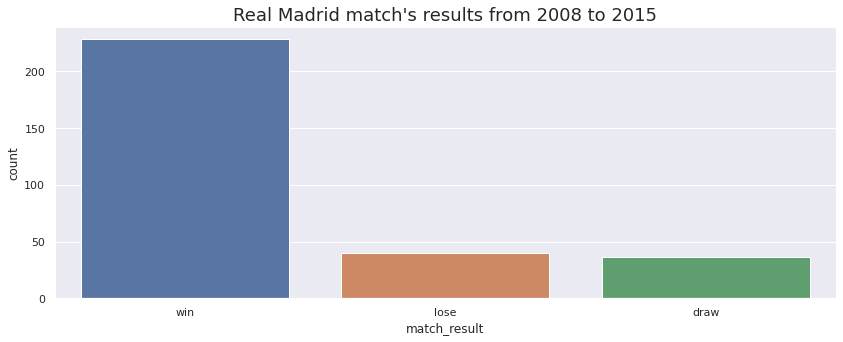

In [46]:
plt.figure(figsize=(14, 5))

sns.countplot("match_result",data=RM ).set_title("Real Madrid match's results from 2008 to 2015", fontsize=18)

In [58]:
Real_Madrid_Statistics = pd.read_sql("""SELECT *
 
                                        FROM Team 

                                        left join Team_Attributes
                                        
                                        on Team_Attributes.team_api_id = Team.team_api_id
                                        
                                        where team_long_name= "Real Madrid CF"
                                        
                        
                        """, conn)
Real_Madrid_Statistics

,id,team_api_id,team_fifa_api_id,team_long_name,team_short_name,id,team_fifa_api_id,team_api_id,date,buildUpPlaySpeed,buildUpPlaySpeedClass,buildUpPlayDribbling,buildUpPlayDribblingClass,buildUpPlayPassing,buildUpPlayPassingClass,buildUpPlayPositioningClass,chanceCreationPassing,chanceCreationPassingClass,chanceCreationCrossing,chanceCreationCrossingClass,chanceCreationShooting,chanceCreationShootingClass,chanceCreationPositioningClass,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass
0,43040,8633,243,Real Madrid CF,REA,1049,243,8633,2010-02-22 00:00:00,55,Balanced,NaN,Little,30,Short,Free Form,70,Risky,60,Normal,70,Lots,Free Form,65,Medium,40,Press,65,Normal,Offside Trap
1,43040,8633,243,Real Madrid CF,REA,1050,243,8633,2011-02-22 00:00:00,54,Balanced,NaN,Little,39,Mixed,Free Form,67,Risky,60,Normal,67,Lots,Free Form,68,High,55,Press,55,Normal,Cover
2,43040,8633,243,Real Madrid CF,REA,1051,243,8633,2012-02-22 00:00:00,45,Balanced,NaN,Little,35,Mixed,Free Form,71,Risky,54,Normal,73,Lots,Free Form,49,Medium,60,Press,68,Wide,Cover
3,43040,8633,243,Real Madrid CF,REA,1052,243,8633,2013-09-20 00:00:00,50,Balanced,NaN,Little,41,Mixed,Organised,68,Risky,54,Normal,72,Lots,Free Form,39,Medium,49,Press,65,Normal,Cover
4,43040,8633,243,Real Madrid CF,REA,1053,243,8633,2014-09-19 00:00:00,50,Balanced,54.0,Normal,41,Mixed,Organised,68,Risky,54,Normal,69,Lots,Free Form,39,Medium,49,Press,65,Normal,Cover
5,43040,8633,243,Real Madrid CF,REA,1054,243,8633,2015-09-10 00:00:00,50,Balanced,57.0,Normal,46,Mixed,Free Form,61,Normal,41,Normal,63,Normal,Free Form,52,Medium,60,Press,63,Normal,Cover


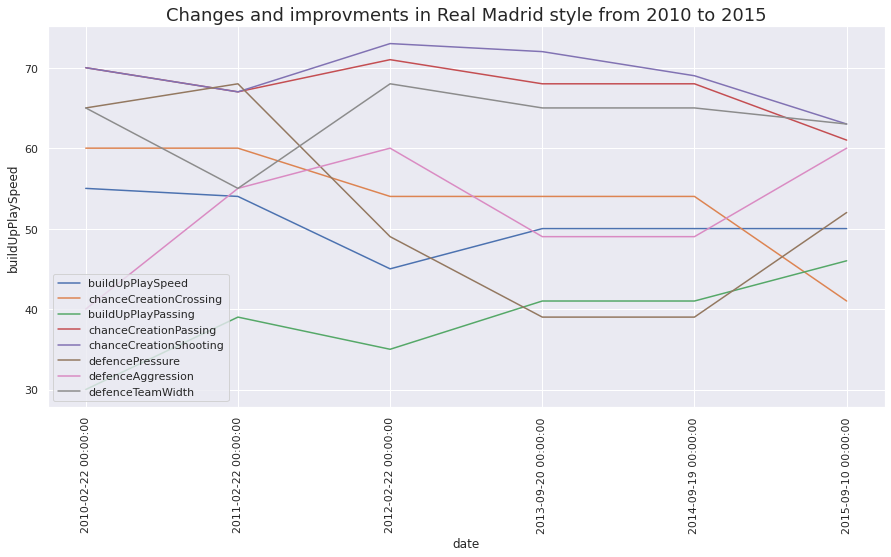

In [59]:
plt.figure(figsize=(15, 7))

sns.lineplot(x="date",y="buildUpPlaySpeed",data=Real_Madrid_Statistics, label="buildUpPlaySpeed").set_title("Changes and improvments in Real Madrid style from 2010 to 2015", fontsize=18)
sns.lineplot(x="date",y="chanceCreationCrossing",data=Real_Madrid_Statistics, label="chanceCreationCrossing")
sns.lineplot(x="date",y="buildUpPlayPassing",data=Real_Madrid_Statistics, label="buildUpPlayPassing")
sns.lineplot(x="date",y="chanceCreationPassing",data=Real_Madrid_Statistics, label="chanceCreationPassing")
sns.lineplot(x="date",y="chanceCreationShooting",data=Real_Madrid_Statistics, label="chanceCreationShooting")
sns.lineplot(x="date",y="defencePressure",data=Real_Madrid_Statistics, label="defencePressure")
sns.lineplot(x="date",y="defenceAggression",data=Real_Madrid_Statistics, label="defenceAggression")
sns.lineplot(x="date",y="defenceTeamWidth",data=Real_Madrid_Statistics, label="defenceTeamWidth")



plt.tick_params(axis='x', rotation=90)


/home/ahmed/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, "FC Barcelona match's results from 2008 to 2015")

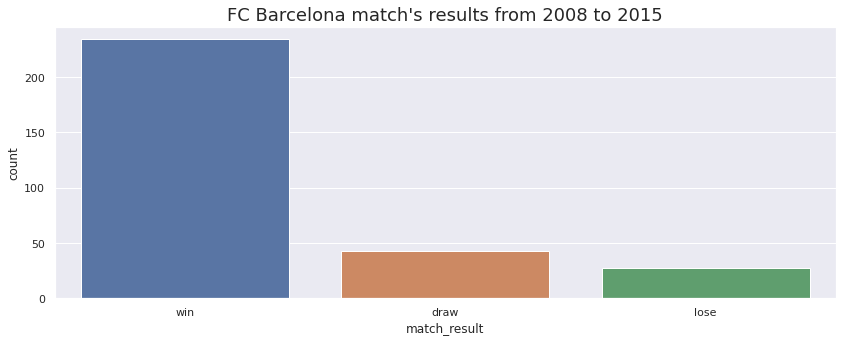

In [47]:
plt.figure(figsize=(14, 5))

sns.countplot("match_result",data=FCB ).set_title("FC Barcelona match's results from 2008 to 2015", fontsize=18)

In [83]:
FC_Barcelona_Statistics = pd.read_sql("""SELECT *
 
                                        FROM Team 

                                        left join Team_Attributes
                                        
                                        on Team_Attributes.team_api_id = Team.team_api_id
                                        
                                        where team_long_name= "FC Barcelona"
                                        
                        
                        """, conn)
FC_Barcelona_Statistics

,id,team_api_id,team_fifa_api_id,team_long_name,team_short_name,id,team_fifa_api_id,team_api_id,date,buildUpPlaySpeed,buildUpPlaySpeedClass,buildUpPlayDribbling,buildUpPlayDribblingClass,buildUpPlayPassing,buildUpPlayPassingClass,buildUpPlayPositioningClass,chanceCreationPassing,chanceCreationPassingClass,chanceCreationCrossing,chanceCreationCrossingClass,chanceCreationShooting,chanceCreationShootingClass,chanceCreationPositioningClass,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass
0,43042,8634,241,FC Barcelona,BAR,119,241,8634,2010-02-22 00:00:00,42,Balanced,NaN,Little,30,Short,Free Form,65,Normal,40,Normal,70,Lots,Free Form,70,High,30,Contain,70,Wide,Offside Trap
1,43042,8634,241,FC Barcelona,BAR,120,241,8634,2011-02-22 00:00:00,43,Balanced,NaN,Little,34,Mixed,Free Form,59,Normal,25,Little,68,Lots,Free Form,67,High,43,Press,68,Wide,Cover
2,43042,8634,241,FC Barcelona,BAR,121,241,8634,2012-02-22 00:00:00,24,Slow,NaN,Little,25,Short,Free Form,37,Normal,24,Little,54,Normal,Free Form,66,Medium,63,Press,66,Normal,Cover
3,43042,8634,241,FC Barcelona,BAR,122,241,8634,2013-09-20 00:00:00,35,Balanced,NaN,Little,32,Short,Free Form,37,Normal,31,Little,35,Normal,Free Form,61,Medium,63,Press,65,Normal,Cover
4,43042,8634,241,FC Barcelona,BAR,123,241,8634,2014-09-19 00:00:00,35,Balanced,35.0,Normal,32,Short,Free Form,37,Normal,31,Little,35,Normal,Free Form,61,Medium,63,Press,65,Normal,Cover
5,43042,8634,241,FC Barcelona,BAR,124,241,8634,2015-09-10 00:00:00,36,Balanced,35.0,Normal,51,Mixed,Free Form,36,Normal,49,Normal,56,Normal,Free Form,61,Medium,65,Press,65,Normal,Cover


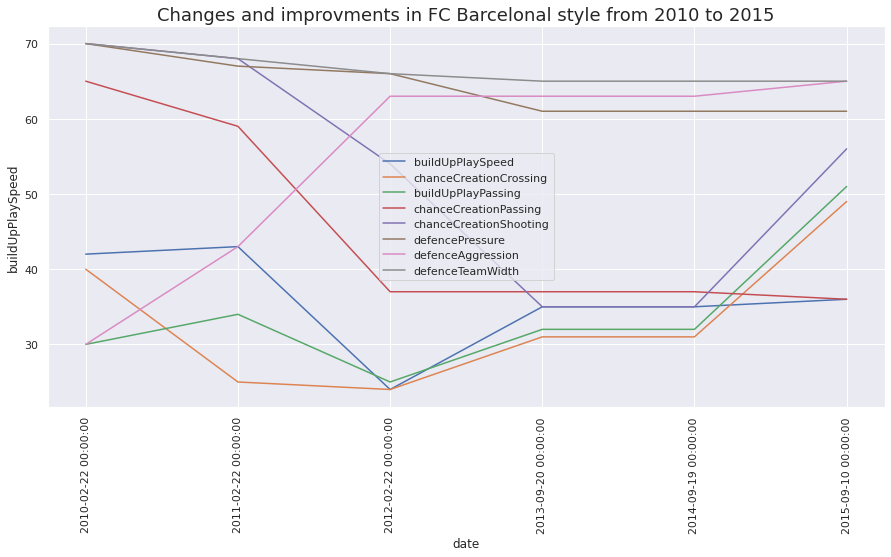

In [84]:
plt.figure(figsize=(15, 7))

sns.lineplot(x="date",y="buildUpPlaySpeed",data=FC_Barcelona_Statistics, label="buildUpPlaySpeed").set_title("Changes and improvments in FC Barcelonal style from 2010 to 2015", fontsize=18)
sns.lineplot(x="date",y="chanceCreationCrossing",data=FC_Barcelona_Statistics, label="chanceCreationCrossing")
sns.lineplot(x="date",y="buildUpPlayPassing",data=FC_Barcelona_Statistics, label="buildUpPlayPassing")
sns.lineplot(x="date",y="chanceCreationPassing",data=FC_Barcelona_Statistics, label="chanceCreationPassing")
sns.lineplot(x="date",y="chanceCreationShooting",data=FC_Barcelona_Statistics, label="chanceCreationShooting")
sns.lineplot(x="date",y="defencePressure",data=FC_Barcelona_Statistics, label="defencePressure")
sns.lineplot(x="date",y="defenceAggression",data=FC_Barcelona_Statistics, label="defenceAggression")
sns.lineplot(x="date",y="defenceTeamWidth",data=FC_Barcelona_Statistics, label="defenceTeamWidth")



plt.tick_params(axis='x', rotation=90)

In [40]:
England_wins = England.pivot_table(index = ['winner'], aggfunc ='size')
England_wins= England_wins.sort_values(ascending=False)
England_wins[:5]

winner
draw                 783
Manchester United    192
Chelsea              176
Manchester City      175
Arsenal              170
dtype: int64

In [41]:
Italy_wins = Italy.pivot_table(index = ['winner'], aggfunc ='size')
Italy_wins= Italy_wins.sort_values(ascending=False)
Italy_wins[:5]

winner
draw        796
Juventus    189
Roma        162
Milan       154
Inter       154
dtype: int64

In [42]:
Germany_wins = Germany.pivot_table(index = ['winner'], aggfunc ='size')
Germany_wins= Germany_wins.sort_values(ascending=False)
Germany_wins[:5]

winner
draw                   597
FC Bayern Munich       193
Borussia Dortmund      157
Bayer 04 Leverkusen    137
FC Schalke 04          127
dtype: int64